In [1]:
from Chapter2.CreateDataset import CreateDataset
from util.VisualizeDataset import VisualizeDataset
from util import util
import copy
import os
import pandas as pd

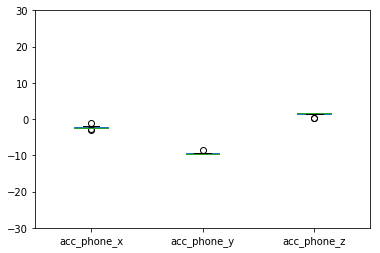

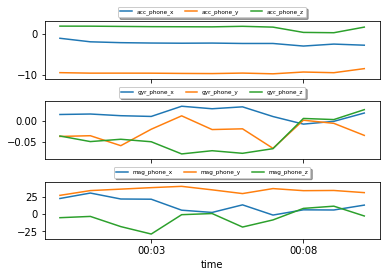

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0 -2.3139553012908363 0.47917417935502243 -3.0196375442809966 -1.1458855892761752
acc_phone_y 0.0 -9.43453351860773 0.34337309295189333 -9.710196867807467 -8.460954783455339
acc_phone_z 0.0 1.404310113203563 0.5859878750182224 0.19347748799199466 1.78188015491453
gyr_phone_x 0.0 0.015287994815 0.0130218395855 -0.007596204726641983 0.03416733215476985
gyr_phone_y 0.0 -0.0252831234716 0.0233152969592 -0.06416417939224123 0.011725645130086717
gyr_phone_z 0.0 -0.0389496421296 0.0355677268792 -0.07722416004002669 0.026175560962353704
mag_phone_x 0.0 12.7576328193 10.0275960042 -1.4226446556611643 30.241303982523945
mag_phone_y 0.0 33.9952735306 3.77716941089 26.92132487902553 39.87999333111037
mag_phone_z 0.0 -5.97318468037 11.9112267865 -28.708238825883925 11.363349999999999


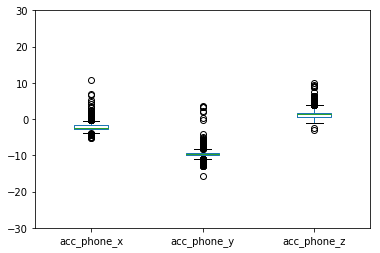

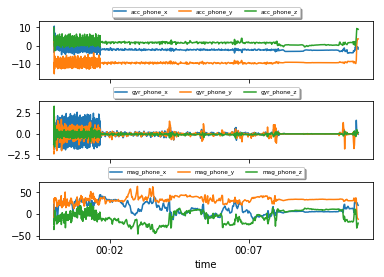

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.635253719954 -2.044301725343465 1.279171581237333 -5.2501560000000005 10.69471544715447
acc_phone_y 0.635253719954 -9.44821739851733 1.5753906758463492 -15.569756097560974 3.65304
acc_phone_z 0.635253719954 1.5237956777774633 1.4161221293742439 -2.923966935483871 9.91471074380165
gyr_phone_x 0.635253719954 0.0151453920184 0.78798654406 -1.9479000000000002 2.6224000000000003
gyr_phone_y 0.635253719954 -0.0288191019645 0.465135658872 -2.423919999999999 2.11673712
gyr_phone_z 0.635253719954 -0.0400978926208 0.254283168662 -1.5849599999999997 3.347483870967742
mag_phone_x 0.635253719954 16.3673205336 12.6593554492 -13.484000000000002 44.92
mag_phone_y 0.635253719954 32.6376719518 7.86214388067 -11.357575757575757 63.99099999999999
mag_phone_z 0.635253719954 -5.09659325863 13.000003154 -45.142999999999994 25.00333333333333


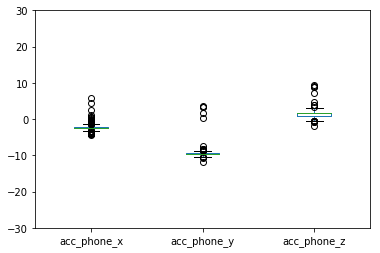

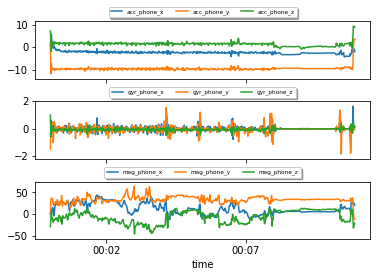

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0 -2.3091515077225413 0.7415169304026357 -4.24716 5.858224048096194
acc_phone_y 0.0 -9.430968469233475 1.1136745216626125 -11.740449799196787 3.65304
acc_phone_z 0.0 1.409060591969474 0.9742545080163934 -1.7769132064128255 9.392685370741484
gyr_phone_x 0.0 0.0157268624577 0.1978378208 -0.9332946492985973 1.6465246
gyr_phone_y 0.0 -0.0248635639222 0.276559128311 -1.8248324649298597 1.5414877999999999
gyr_phone_z 0.0 -0.0391135562825 0.105692789607 -0.6096182128514055 1.000167469879518
mag_phone_x 0.0 12.7735732138 12.3879454317 -12.052 44.229
mag_phone_y 0.0 33.9735039789 7.20005167193 -11.357575757575757 63.99099999999999
mag_phone_z 0.0 -6.0122513851 14.0303731611 -45.142999999999994 14.797


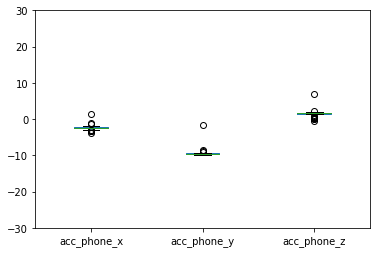

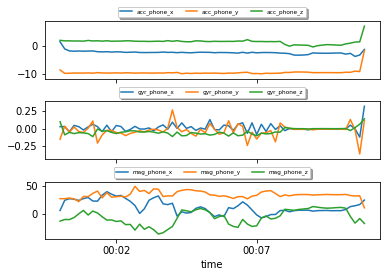

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0 -2.3031691428072674 0.6343667933119811 -3.715053031819091 1.4757745942696856
acc_phone_y 0.0 -9.388099553004812 0.9913381293451842 -9.854173243946368 -1.6436148053837751
acc_phone_z 0.0 1.4414479132156954 0.9191287011657879 -0.36877969981989195 6.988355365587487
gyr_phone_x 0.0 0.0175128789175 0.0577326576486 -0.11836881727381907 0.32312690267481853
gyr_phone_y 0.0 -0.0241643125261 0.087972060772 -0.3575861835468375 0.2703702411446869
gyr_phone_z 0.0 -0.0380893381641 0.0472197591896 -0.11066237982789674 0.14350481352693925
mag_phone_x 0.0 12.8462859122 11.5783062136 -6.738238238238238 39.26366492146597
mag_phone_y 0.0 33.8571425359 5.83929451422 10.92532833020638 48.68740000000001
mag_phone_z 0.0 -6.07571992389 13.1633153353 -35.195995995996 13.144710578842316
attribute, fraction missing values, mean, standard deviation, min, max
acc_phone_x & 0.00  /  63.53  &  -2.31  /  -2.04  &  0.48  /  1.28  &  -3.

In [9]:
dataset_path = '/Users/tommymaaiveld/Documents/Github/planningandreinf/ML4QS/ML4QS-master/datasets/phyphox_erik_thurs/'
result_dataset_path = './intermediate_datafiles/'

if not os.path.exists(result_dataset_path):
    print('Creating result directory: ' + result_dataset_path)
    os.makedirs(result_dataset_path)

# Chapter 2: Initial exploration of the dataset.

# Set a granularity (i.e. how big are our discrete time steps). We start very
# coarse grained, namely one measurement per minute, and secondly use four measurements
# per second

granularities = [60000, 250, 1000,10000]
datasets = []

for milliseconds_per_instance in granularities:

    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_path, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('Accelerometer.csv', 'timestamps', ['x',
                                                                      'y',
                                                                      'z'], 'avg', 'acc_phone_')
#     DataSet.add_numerical_dataset('accelerometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_watch_')

    # We add the gyroscope data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('Gyroscope.csv', 'timestamps', ['x',
                                                                  'y',
                                                                  'z'], 'avg', 'gyr_phone_')
#     DataSet.add_numerical_dataset('gyroscope_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_watch_')

    # We add the heart rate (continuous numerical measurements) and aggregate by averaging again
    # DataSet.add_numerical_dataset('heart_rate_smartwatch.csv', 'timestamps', ['rate'], 'avg', 'hr_watch_')

    # We add the labels provided by the users. These are categorical events that might overlap. We add them
    # as binary attributes (i.e. add a one to the attribute representing the specific value for the label if it
    # occurs within an interval).
    # DataSet.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

    # We add the amount of light sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    #DataSet.add_numerical_dataset('light_phone.csv', 'timestamps', ['lux'], 'avg', 'light_phone_')

    # We add the magnetometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values
    DataSet.add_numerical_dataset('Magnetometer.csv', 'timestamps',['x',
                                                                    'y',
                                                                    'z'], 'avg', 'mag_phone_')
#     DataSet.add_numerical_dataset('magnetometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_watch_')

    # We add the pressure sensed by the phone (continuous numerical measurements) and aggregate by averaging again
#     DataSet.add_numerical_dataset('Pressure.csv', 'timestamps', ['pressure'], 'avg', 'press_phone_')

    # Get the resulting pandas data table

    dataset = DataSet.data_table

    # Plot the data

    DataViz = VisualizeDataset()

    # Boxplot
    DataViz.plot_dataset_boxplot(dataset, ['acc_phone_x',
                                           'acc_phone_y',
                                           'acc_phone_z'])

    # Plot all data
    DataViz.plot_dataset(dataset, ['acc_', 'gyr_', 'mag_'], ['like', 'like', 'like','like'], ['line', 'line', 'line','points'])

    # And print a summary of the dataset

    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

# And print the table that has been included in the book
util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])
util.print_latex_table_statistics_two_datasets(datasets[2], datasets[3])

# Finally, store the last dataset we have generated (250 ms).
dataset.to_csv(result_dataset_path + 'chapter2_result_notebook.csv')
